In [2]:
from pathlib import Path
import torch
from anomalib.data import Folder
from anomalib.models import Padim
from anomalib.engine import Engine
from anomalib.utils.post_processing import superimpose_anomaly_map
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from anomalib.models import (
    Dfm, EfficientAd, Padim, Patchcore,
    ReverseDistillation, Stfpm, Supersimplenet, Uflow,
    Cflow, Csflow, Draem, Fastflow, Ganomaly, 
    Dfkde, WinClip, Cfa, Dsr
)

# Step 1: Define the path to your dataset
dataset_root = "./datasets"

# Step 2: Configure the datamodule using the Folder class
datamodule = Folder(
    name="custom_dataset",  # Provide a name for your dataset
    root=dataset_root,
    normal_dir="train/good",
    abnormal_dir="test"
)

<frozen importlib.util>:262: DeprecationWarning: The `openvino.runtime` module is deprecated and will be removed in the 2026.0 release. Please replace `openvino.runtime` with `openvino`.
c:\Users\gusta\anaconda3\envs\master\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [3]:

# Step 1: Define the mapping of algorithm names to their respective model classes and checkpoint paths
model_info = {
    "CFA": {
        "class": Cfa,
        "checkpoint": Path("results/CFA/v1/Cfa/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
    "CFlow": {
        "class": Cflow,
        "checkpoint": Path("results/CFlow/v1/Cflow/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
    "CS-Flow": {
        "class": Csflow,
        "checkpoint": Path("results/CS-Flow/v1/Csflow/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
    "DFKDE": {
        "class": Dfkde,
        "checkpoint": Path("results/DFKDE/v1/Dfkde/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
    "DFM": {
        "class": Dfm,
        "checkpoint": Path("results/DFM/v1/Dfm/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
    "DRAEM": {
        "class": Draem,
        "checkpoint": Path("results/DRAEM/v1/Draem/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
    "DSR": {
        "class": Dsr,
        "checkpoint": Path("results/DSR/v1/Dsr/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
    "EfficientAD": {
        "class": EfficientAd,
        "checkpoint": Path("results/EfficientAD/v1/EfficientAd/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
    "GANomaly": {
        "class": Ganomaly,
        "checkpoint": Path("results/GANomaly/v1/Ganomaly/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
    "PaDiM": {
        "class": Padim,
        "checkpoint": Path("results/PaDiM/v1/Padim/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
    "PatchCore": {
        "class": Patchcore,
        "checkpoint": Path("results/PatchCore/v1/Patchcore/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
    "ReverseDistillation": {
        "class": ReverseDistillation,
        "checkpoint": Path("results/ReverseDistillation/v1/ReverseDistillation/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
    "STFPM": {
        "class": Stfpm,
        "checkpoint": Path("results/STFPM/v1/Stfpm/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
    "U-Flow": {
        "class": Uflow,
        "checkpoint": Path("results/U-Flow/v1/Uflow/custom_dataset/latest/weights/lightning/model.ckpt"),
    },
}

# Step 2: Select the algorithm
selected_algorithm = "PaDiM"  # Change this to select a different algorithm


# Step 3: Load the model architecture and weights
if selected_algorithm in model_info:
    model_class = model_info[selected_algorithm]["class"]
    checkpoint_path = model_info[selected_algorithm]["checkpoint"]
    if checkpoint_path.exists():
        model = model_class.load_from_checkpoint(checkpoint_path)
    else:
        raise FileNotFoundError(f"Checkpoint not found at {checkpoint_path}")
else:
    raise ValueError(f"Algorithm {selected_algorithm} is not recognized.")


INFO:anomalib.models.components.base.anomalib_module:Initializing Padim model.
INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
INFO:timm.models._hub:[timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:timm.models._builder:Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.


In [4]:

# Step 4: Set up the engine
engine = Engine(accelerator="auto", devices=1, logger=False)

# Step 5: Perform inference
engine.test(datamodule=datamodule, model=model)


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:lightning_fabric.utilities.rank_zero:`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
INFO:lightning_fabric.utilities.rank_zero:You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:anomalib.data.datamodules.base.image:No normal test images found. Sampling from training set using ratio of 0.20
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\gusta\anaconda3\envs\master\Lib\si

Testing: |          | 0/? [00:00<?, ?it/s]

c:\Users\gusta\anaconda3\envs\master\Lib\site-packages\torchmetrics\utilities\prints.py:43: UserWarning: The ``compute`` method of metric AUROC was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
c:\Users\gusta\anaconda3\envs\master\Lib\site-packages\torchmetrics\utilities\prints.py:43: UserWarning: The ``compute`` method of metric F1Score was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
INFO:anomalib.callbacks.timer:Testing took 12.649559020996094 seconds
Throughput (batch_size=32) : 5.612843885083441 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9999999403953552     │
│       image_F1Score       │     0.978723406791687     │
└───────────────────────────┴───────────────────────────┘

[{'image_AUROC': 0.9999999403953552, 'image_F1Score': 0.978723406791687}]

In [5]:

# Step 6: Predict on a single image
dataset_root = Path("./datasets")
data_path = dataset_root / "test" / "000_fold.png"
predictions = engine.predict(model=model, data_path=data_path)
prediction = predictions[0]  # Get the first and only prediction


INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\gusta\anaconda3\envs\master\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

In [6]:

# Step 7: Visualize the results
image_path = prediction.image_path[0]
image_size = prediction.image.shape[-2:]
image = np.array(Image.open(image_path).resize(image_size))


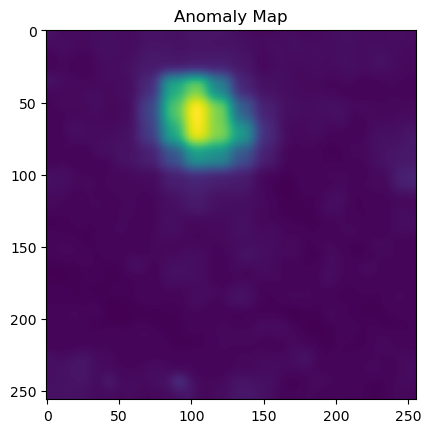

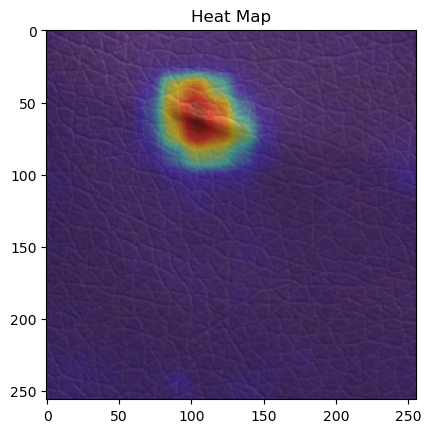

Prediction Score: 0.8620664477348328, Prediction Label: True


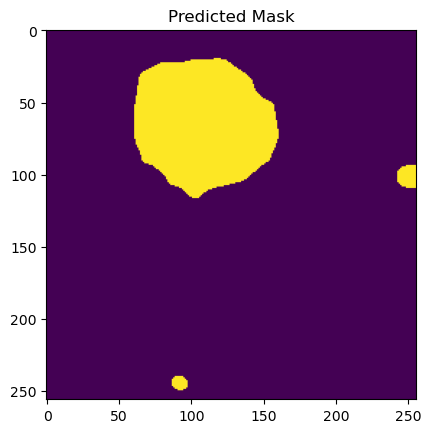

In [7]:

anomaly_map = prediction.anomaly_map[0].cpu().numpy().squeeze()
plt.imshow(anomaly_map)
plt.title("Anomaly Map")
plt.show()

heat_map = superimpose_anomaly_map(anomaly_map=anomaly_map, image=image, normalize=True)
plt.imshow(heat_map)
plt.title("Heat Map")
plt.show()

pred_score = prediction.pred_score[0].item()
pred_label = prediction.pred_label[0].item()
print(f"Prediction Score: {pred_score}, Prediction Label: {pred_label}")

pred_mask = prediction.pred_mask[0].squeeze().cpu().numpy()
plt.imshow(pred_mask)
plt.title("Predicted Mask")
plt.show()


In [12]:
# print the dimentions of imags on the dataset/train/good folder

image_path = "./datasets/train/good/000.png"
image = Image.open(image_path)
image_size = image.size  # (width, height)
print(f"Image size: {image_size}")  # Output: (width, height)


Image size: (1024, 1024)
